In [7]:
# 3/3/24 Greenberger-Horne-Zeilinger (GHZ) State 15 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
import os
import json
from qiskit.visualization import plot_histogram

In [3]:
# connecting api key from my account to simulate the circuits
api_key = "22f5ffa4443b97a2cfe06ce1b5f3af5c20e7478ca1b37843e2c45b80c9259f43"
provider = qss.SuperstaqProvider(api_key)
# making sure to not run out of balance
print(provider.get_balance())

# setting circuit name to avoid having to change it everytime
name = "hm"

10.65 credits


In [4]:
# defining which circuit I want to use and how many qubits
qc = supermarq.hamiltonian_simulation.HamiltonianSimulation(num_qubits=10)
qc_circuit = qc.qiskit_circuit()

0.9863658905932746
0.9987903594067254
0.9948841094067253
0.9941783905932745
0.9839466094067255
0.9886341094067255
0.9950712477361316
0.9978893280932745
0.999560335037719
0.9976158905932746
0.9985817996841837
0.9940481822599414
0.9950043017144177
0.9961117879781539
0.9988424427400586
0.9988658905932748
0.9988658905932748
{'1111110000': 1, '1100111000': 1, '1101111000': 1, '1111111000': 3, '1101110100': 1, '0111110100': 1, '1111110100': 1, '1111101100': 2, '1111011100': 1, '1110111100': 1, '0101111100': 1, '1101111100': 1, '1011111100': 1, '1111111100': 4, '0011110010': 1, '1011110010': 1, '1111001010': 1, '1111101010': 1, '1111011010': 1, '1100111010': 1, '0010111010': 1, '1110111010': 1, '1101111010': 3, '0011111010': 1, '1011111010': 1, '1111111010': 3, '1111100110': 1, '1110010110': 1, '1101010110': 1, '0011010110': 1, '0111010110': 1, '1110110110': 1, '0111110110': 3, '1111110110': 12, '1111001110': 2, '1011101110': 1, '1111101110': 1, '1110011110': 1, '1001011110': 1, '0011011110':

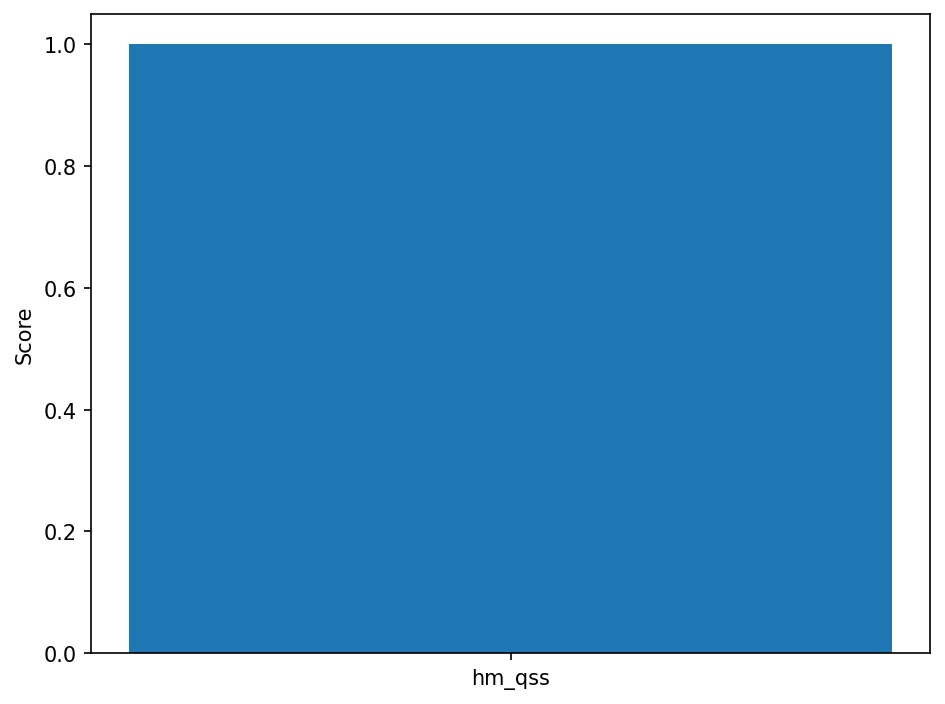

In [5]:
# setting the shot interval
x = 64

# setting up a simple while loop
while x<= 1024:   
    # setting the simulator that we will use to simulate our circuit (the default is ss_unconstrained_simulator)
    backend = provider.get_backend("ibmq_statevector_simulator")
    job_qss = backend.run(qc_circuit, shots=x, method="dry-run")

    # gettng the results of the simulation 
    job = job_qss.result()

    # getting the counts and printing them
    counts = job.get_counts()
    
    # getting accuracy to make sure this is accurate
    score = qc.score(counts)
    print(score)
    
    # creating a dictionary with outputs
    data = {
        'counts': counts,
        'accuracy': score
    }

    # logging results into a json file
    with open(name + '_counts_' + str(x) + '.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
        
    x += 64

0.9988658905932748
{'1111110000': 1, '1100111000': 1, '1101111000': 1, '1111111000': 3, '1101110100': 1, '0111110100': 1, '1111110100': 1, '1111101100': 2, '1111011100': 1, '1110111100': 1, '0101111100': 1, '1101111100': 1, '1011111100': 1, '1111111100': 4, '0011110010': 1, '1011110010': 1, '1111001010': 1, '1111101010': 1, '1111011010': 1, '1100111010': 1, '0010111010': 1, '1110111010': 1, '1101111010': 3, '0011111010': 1, '1011111010': 1, '1111111010': 3, '1111100110': 1, '1110010110': 1, '1101010110': 1, '0011010110': 1, '0111010110': 1, '1110110110': 1, '0111110110': 3, '1111110110': 12, '1111001110': 2, '1011101110': 1, '1111101110': 1, '1110011110': 1, '1001011110': 1, '0011011110': 1, '1011011110': 1, '1111011110': 6, '0100111110': 1, '1100111110': 4, '1110111110': 5, '0001111110': 1, '1001111110': 1, '0101111110': 1, '1101111110': 5, '0011111110': 3, '1011111110': 4, '0111111110': 9, '1111111110': 42, '1111110001': 1, '0101001001': 1, '1101101001': 1, '0111101001': 2, '11111010

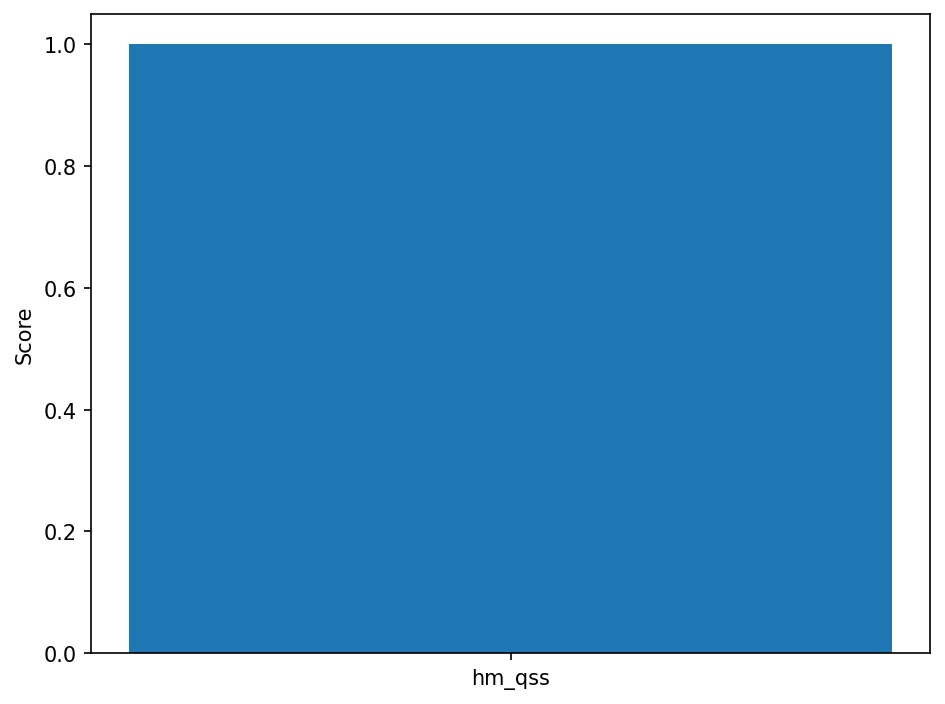

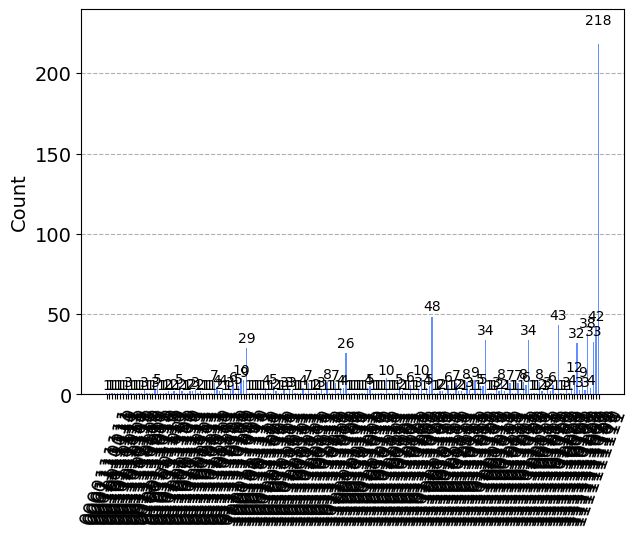

In [8]:
# measuring and getting fidelity of the result       
score = qc.score(counts)
print(score)
print(counts)

# plotting a bar chart of the benchmark results
supermarq.plotting.plot_results([score], [name + "_qss"])

# plotting a bar chart of the counts results
plot_histogram(counts)